Eccentric Binary Black Hole Orbital Decay

This program solves the coupled set of ODEs given by equations 5.6 & 5.7 in Peters (1964).

-Marcus E. Lower (2017)

In [1]:
%pylab inline

import numpy as np

import astropy.constants as c
import astropy.units as u

from scipy import integrate

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Binary attributes:

In [2]:
m1 = 36.0*u.Msun
m2 = 29.0*u.Msun 

Rs1 = (2*c.G*m1)/(c.c**2)
Rs2 = (2*c.G*m2)/(c.c**2)

P = 1.*u.day

Initial conditions: separation and eccentricity at binary formation

In [13]:
ai = ((c.G *(m1 + m2)*P**2/(4.*np.pi**2))**(1./3.)).si.value
ei = 0.8

Equations 5.6 & 5.7 from Peters (1964) are a set of coupled ODEs given as: 

$\big<\frac{da}{dt}\big> = -\frac{64}{5}\frac{G^{3}m_{1}m_{2}(m_{1}+m_{2})}{c^{5}a^{3}(1-e^{2})^{7/2}}\Big[1+\frac{73}{24}e^{2}+\frac{37}{96}e^{4}\Big]$    

$\big<\frac{de}{dt}\big> = -\frac{304}{15}e\frac{G^{3}m_{1}m_{2}(m_{1}+m_{2})}{c^{5}a^{4}(1-e^{2})^{2}}\Big[1+\frac{121}{304}e^{2}\Big]$

These are integrated below to find the decay in eccentricity and semi-major axis with time.

In [14]:
def dOdt(O,t=0):
    '''
    O = [semi-major axis, eccentricity]
    '''
    alpha = (c.G**3*m1*m2*(m1+m2)/c.c**5).si
    return np.array([
        (-64./5. * alpha/(O[0]**3*(1. - O[1]**2)**(7./2.)) * (1. + 73./24.*O[1]**2 + 37./96.*O[1]**4)).si.value, 
        (-304./15. * O[1] * alpha/(O[0]**4*(1. - O[1]**2)**(5./2.)) * (1. + 121./304.*O[1]**2)).si.value
    ])

In [15]:
tmax = (1.5e9*u.yr).si.value                 # maximum time value
time = np.logspace(-1, np.log10(tmax), 3000) # array of 3000 time values
Init = array([ai, ei])                       # initial conditions

O, infodict = integrate.odeint(dOdt, Init, time, full_output=True)

infodict['message']

/Users/MarcusLower/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


'Excess work done on this call (perhaps wrong Dfun type).'

Calculating the orbital period and the resulting gravitational wave frequency emitted by the binary:

In [ ]:
Period = ((O[:,0]**2 * (4.*np.pi**2)/(c.G*(m1+m2)))**(1/2)).si.value
GWfreq = 2/(Period)

/Users/MarcusLower/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


Plotting Semi-major axis [m] vs time [years] & Eccentricy vs time [years]:

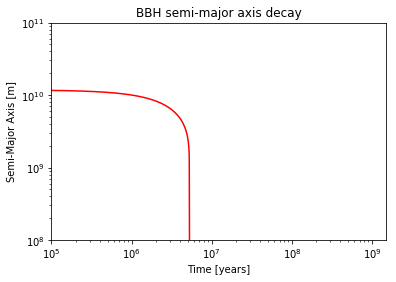

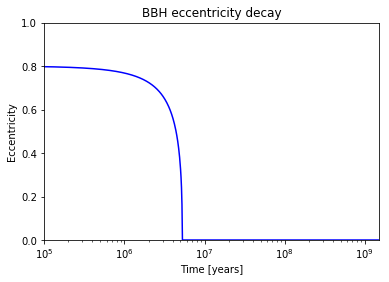

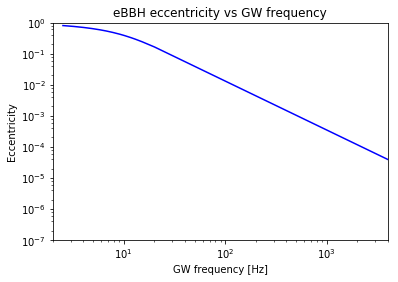

In [ ]:

time_year = (time * u.s).to('yr').value

f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.loglog(time_year,O[:,0],color='red')
plt.title('BBH semi-major axis decay')
plt.xlabel('Time [years]')
plt.ylabel(r'Semi-Major Axis [m]')
plt.xlim(1e5,max(time_year))
plt.ylim(1e8,1e11)
plt.show()

f2 = plt.figure()
ax2 = f2.add_subplot(111)
ax2.semilogx(time_year,O[:,1],color='blue')
plt.title('BBH eccentricity decay')
plt.xlabel('Time [years]')
plt.ylabel(r'Eccentricity')
plt.xlim(1e5,max(time_year))
plt.ylim(1e-7,1)
plt.show()

f3 = plt.figure()
ax3 = f3.add_subplot(111)
ax3.loglog(GWfreq,O[:,1],color='blue')
plt.title('eBBH eccentricity vs GW frequency')
plt.xlabel('GW frequency [Hz]')
plt.ylabel(r'Eccentricity')
plt.xlim(2,4000)
plt.ylim(1e-7,1)
plt.show()